<a href="https://colab.research.google.com/github/michal-g/Notebooks-to-Packages/blob/main/1-Notebooks/predicting-ufo
-sightings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We start by acquiring the data on UFO sightings. Fortunately, github user Link Wentz has been nice enough to download
it from the website and parse it into a reasonable format, which we make available here.

We notice however that there are irregularities in some of the entries, which we would like to clean up!

In [29]:
import pandas as pd

sightings = pd.read_csv('../nuforc_events_complete.csv',
                        usecols=['event_time', 'city', 'state',
                                 'shape', 'duration', 'summary'])

print(sightings.head())
print('----------')
print("Number of duplicate rows:")
print(sightings.duplicated().sum())
print('----------')
print("# of rows by state:")
print(sightings.state.value_counts())

print(pd.to_datetime(sightings.event_time,
                     format="%Y-%m-%dT%H:%M:%SZ", errors='coerce'))


             event_time                city state     shape    duration  \
0  2021-05-19T20:15:00Z             Atlanta    GA    Sphere      10 min   
1  2021-05-19T17:25:00Z         Glens Falls    NY  Triangle  20 minutes   
2  2021-05-19T14:30:00Z       North Haledon    NJ     Other     20 mins   
3  2021-05-19T10:50:00Z          Clarksburg    MD  Triangle       1 min   
4  2021-05-19T01:00:00Z  Sharon Connecticut    CT     Light      1 hour   

                                             summary  
0  Two black UFO over Atlanta one coming close to...  
1            Triangular object over the Hudson River  
2  I’m no stranger to flying things but yesterday...  
3                                       Triangle ufo  
4         Strange star over northwestern connecticut  
----------
Number of duplicate rows:
0
----------
# of rows by state:
CA    14749
FL     7273
WA     6483
TX     5489
NY     5222
      ...  
Fl        5
VI        2
QB        1
M0        1
Ca        1
Name: state, Leng

In [39]:
# we will be very careful about filtering sightings that can be mapped to states
valid_states = {
    'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
    'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
    'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
    'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
    'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'
    }
sightings = sightings.loc[sightings.state.isin(valid_states), :]

# parse the date information into a more useful format
sightings['event_time'] = pd.to_datetime(sightings.event_time,
                                         format="%Y-%m-%dT%H:%M:%SZ", errors='coerce')
print(f"{sightings['event_time'].isna().sum()} rows with missing times")

sightings = sightings.loc[~sightings['event_time'].isna(), :]
print(sightings.head())
print(sightings.tail())
print("---------")
print(f"{sightings.shape[0]} total sightings")


0 rows with missing times
           event_time                city state     shape    duration  \
0 2021-05-19 20:15:00             Atlanta    GA    Sphere      10 min   
1 2021-05-19 17:25:00         Glens Falls    NY  Triangle  20 minutes   
2 2021-05-19 14:30:00       North Haledon    NJ     Other     20 mins   
3 2021-05-19 10:50:00          Clarksburg    MD  Triangle       1 min   
4 2021-05-19 01:00:00  Sharon Connecticut    CT     Light      1 hour   

                                             summary  
0  Two black UFO over Atlanta one coming close to...  
1            Triangular object over the Hudson River  
2  I’m no stranger to flying things but yesterday...  
3                                       Triangle ufo  
4         Strange star over northwestern connecticut  
                event_time          city state     shape             duration  \
131983 1910-05-28 21:00:00         Solon    ME   Unknown           don't know   
131986 1899-06-30 07:00:00    Carrollton   

Let's examine the total number of sightings from across the year for each state. We see that California is a very popular destination!

In [47]:
import plotly.express as px


state_totals = sightings.groupby('state').size()

fig = px.choropleth(locations=[str(x) for x in state_totals.index],
                    scope="usa", locationmode="USA-states",
                    color=state_totals.values,
                    range_color=[0, state_totals.max()],
                    color_continuous_scale=['white', 'red'])
fig.show()


state
AK      585
AL     1207
AR     1055
AZ     4434
CA    14569
CO     2803
CT     1693
DC      132
DE      355
FL     7195
GA     2385
HI      619
IA     1103
ID     1153
IL     3854
IN     2217
KS     1052
KY     1495
LA      998
MA     2337
MD     1617
ME     1066
MI     3258
MN     1894
MO     2455
MS      707
MT      902
NC     3219
ND      238
NE      636
NH     1017
NJ     2530
NM     1474
NV     1535
NY     5156
OH     3881
OK     1311
OR     3187
PA     4386
RI      546
SC     2008
SD      337
TN     2017
TX     5404
UT     1357
VA     2347
VT      539
WA     6408
WI     2219
WV      813
WY      372
dtype: int64


To better understand how sightings vary across the year, we'll animate the weekly numbers of sightings for each state. Note the use of multi-dimensional `groupby` to create a table with sightings broken down by time and place.

state        AK   AL   AR   AZ   CA   CO   CT   DC   DE   FL  ...   SD   TN  \
1980-01-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1980-01-02  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1980-01-03  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1980-01-04  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1980-01-05  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1999-12-27  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1999-12-28  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1999-12-29  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1999-12-30  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1999-12-31  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

state        TX   UT   VA   VT   WA   WI   WV   WY 

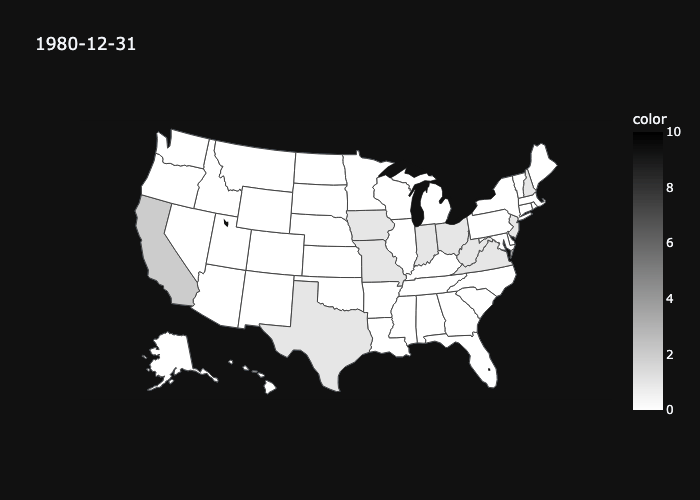

In [49]:
import imageio
from IPython.display import Image
from pathlib import Path


# create a Week x State table containing total weekly sightings for each state;
# note that we have to take into account "missing" weeks that did not have any
# sightings in any states
state_table = sightings.groupby(['event_time', 'state']).size().unstack().fillna(0)
state_table = state_table.reindex(
  index=pd.date_range('01-01-1980', '12-31-1999'), fill_value=0).sort_index()
state_yearlies = state_table.groupby(
  pd.Grouper(axis=0, freq='Y', sort=True)).sum()

print(state_table)
print(state_yearlies.sum())

# create a list of individual files and a place to save them
plt_files = list()
!mkdir -p map-plots

# create a map of sightings by state for each week
for year, year_counts in state_yearlies.iterrows():
    day_lbl = year.strftime('%Y')
    state_locs = [str(x) for x in year_counts.index.get_level_values('state')]

    fig = px.choropleth(locations=state_locs, locationmode="USA-states",
                        title=day_lbl, scope='usa',
                        color=year_counts.values, range_color=[0, 10],
                        color_continuous_scale=['white', 'black'])

    # save the map to file and keep track of the file name
    plt_file = Path("map-plots", f"counts_{day_lbl}.png")
    fig.write_image(plt_file, format='png')
    plt_files += [imageio.v2.imread(plt_file)]

# create an animation using the individual weekly maps
imageio.mimsave(Path("map-plots", "counts.gif"), plt_files, duration=0.03)
Image(filename=str(Path("map-plots", "counts.gif")))


A time series regression model can predict the number of sightings that will take place on each of a series of weeks. We set up a cross-validation process in which the model makes predictions across chunks of our year range by training on preceding chunks. The quality of the predictions is judged using root-mean-squared-error, which is useful as it places the error in the same scale as the original data.

To improve our model's performance, we can try to swap out or rearrange elements of the prediction pipeline, as well as tune the hyper-parameters of the input transformers and prediction algorithms. This is left as an exercise to the reader!

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14, 9)
import numpy as np

! pip install skits
from skits.preprocessing import ReversibleImputer
from skits.pipeline import ForecasterPipeline
from skits.feature_extraction import (AutoregressiveTransformer,
                                      SeasonalTransformer)

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit


pipeline = ForecasterPipeline([
    ('pre_scaler', StandardScaler()),
    ('features', FeatureUnion([
      ('ar_features', AutoregressiveTransformer(num_lags=52)),
      ('seasonal_features', SeasonalTransformer(seasonal_period=52)),
      ])),
    ('post_feature_imputer', ReversibleImputer()),
    ('post_feature_scaler', StandardScaler()),
    ('regressor', LinearRegression())
    ])

# assets and specially formatted objects used by the prediction pipeline
# scikit-learn wants Xs to be 2-dimensional and ys to be 1-dimensional
tscv = TimeSeriesSplit(n_splits=4)
cali_weeklies = state_weeklies.CA
cali_dates = cali_weeklies.index.values.reshape(-1, 1)
cali_values = cali_weeklies.values

real_values = list()
pred_values = list()

# for each cross-validation fold, use the training samples in the fold to
# train the pipeline and the remaining samples to test it
for train_index, test_index in tscv.split(cali_weeklies):
    pipeline.fit(cali_dates[train_index], cali_values[train_index])
    preds = pipeline.predict(cali_dates[test_index], to_scale=True)

    # we'll keep track of the actual sightings and the predicted sightings from
    # each c-v fold for future reference
    real_values += cali_values[test_index].flatten().tolist()
    pred_values += preds.flatten().tolist()

    plt.plot(cali_dates[test_index], cali_values[test_index], color='black')
    plt.plot(cali_dates[test_index], preds, color='red')

# measure the quality of the predictions using root-mean-squared-error
rmse_val = ((np.array(real_values) - np.array(pred_values)) ** 2).mean() ** 0.5
print(f"RMSE: {format(rmse_val, '.3f')}")
